# Linear Regression

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Plotting configuration
sns.set_theme(style="whitegrid")
print(f"PyTorch Version: {torch.__version__}")

# For reproducibility
torch.manual_seed(42)
np.random.seed(42)

PyTorch Version: 2.3.0+cu118


In [3]:
w = 2.5 # weight/ slope
b = 5.0 # bias/ intercept
NUM_SAMPLES = 100

In [4]:
# Features (X) 
x = torch.rand(NUM_SAMPLES, 1) * 10
noise = torch.randn(NUM_SAMPLES, 1) * 1.5
y = w*x + b + noise

In [8]:
x[:5], noise[:5], y[:5]

(tensor([[8.8227],
         [9.1500],
         [3.8286],
         [9.5931],
         [3.9045]]),
 tensor([[ 0.9611],
         [ 0.8749],
         [ 1.6004],
         [-0.6752],
         [-1.0181]]),
 tensor([[28.0179],
         [28.7500],
         [16.1720],
         [28.3074],
         [13.7431]]))

In [9]:
x_train, y_train = x, y
print(f"x_train shape: {x_train.shape}")
print(f"y_train shape: {y_train.shape}")

x_train shape: torch.Size([100, 1])
y_train shape: torch.Size([100, 1])


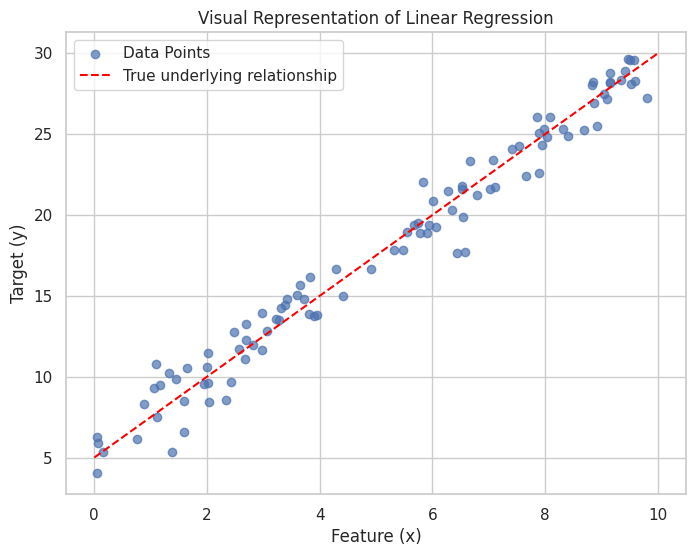

In [14]:
plt.figure(figsize=(8, 6))
plt.scatter(x_train.numpy(), y_train.numpy(), alpha=0.7, label='Data Points')

# create a line representing the true relationship
x_line = torch.linspace(0, 10, 100).view(-1, 1)
y_line = w * x_line + b
plt.plot(x_line.numpy(), y_line.numpy(), color='red', linestyle='--', label='True underlying relationship')

plt.xlabel("Feature (x)")
plt.ylabel("Target (y)")
plt.title("Visual Representation of Linear Regression")
plt.legend()
plt.show()

### Linear Regression Implementation (Manually)

In [17]:
# Parameters
# h(x) = weights * x  + bias
weights_manual = torch.randn(1, requires_grad=True, dtype=torch.float32)
bias_manual = torch.randn(1, requires_grad=True, dtype=torch.float32)

In [21]:
weights_manual.item(), bias_manual.item()

(-1.2842116355895996, -0.6916776895523071)

In [22]:
# Hyperparameters
lr = 0.01
epochs = 500

In [25]:
loss_history_manual = []
for epoch in range(epochs):
    # Forward pass: Compute predictions
    y_predicted_manual = x_train * weights_manual + bias_manual
    # Compute loss (MSE)
    loss_manual = torch.mean((y_predicted_manual - y_train)**2)
    loss_history_manual.append(loss_manual.item())
    # Backward pass: Compute gradients
    if weights_manual.grad is not None: weights_manual.grad.zero_()
    if bias_manual.grad is not None: bias_manual.grad.zero_()
    loss_manual.backward()
    # update parameters
    with torch.no_grad():
        weights_manual -= lr * weights_manual.grad
        bias_manual -= lr * bias_manual.grad
    if (epoch + 1) % 50 == 0:
        print(f"Epoch [{epoch+1}/{epochs}], Loss: {loss_manual.item():.4f}, "
              f"Weights: {weights_manual.item():.3f}, Bias: {bias_manual.item():.3f}")


print("-------------------------------------------------------")
print(f"Learned weights_manual: {weights_manual.item():.4f} (True slope: {w})")
print(f"Learned bias_manual: {bias_manual.item():.4f} (True intercept: {b})")

Epoch [50/500], Loss: 3.1831, Weights: 2.817, Bias: 2.727
Epoch [100/500], Loss: 2.5397, Weights: 2.735, Bias: 3.284
Epoch [150/500], Loss: 2.1411, Weights: 2.670, Bias: 3.723
Epoch [200/500], Loss: 1.8941, Weights: 2.619, Bias: 4.069
Epoch [250/500], Loss: 1.7412, Weights: 2.579, Bias: 4.341
Epoch [300/500], Loss: 1.6464, Weights: 2.547, Bias: 4.555
Epoch [350/500], Loss: 1.5877, Weights: 2.523, Bias: 4.723
Epoch [400/500], Loss: 1.5514, Weights: 2.503, Bias: 4.856
Epoch [450/500], Loss: 1.5288, Weights: 2.488, Bias: 4.960
Epoch [500/500], Loss: 1.5149, Weights: 2.476, Bias: 5.042
-------------------------------------------------------
Learned weights_manual: 2.4755 (True slope: 2.5)
Learned bias_manual: 5.0425 (True intercept: 5.0)


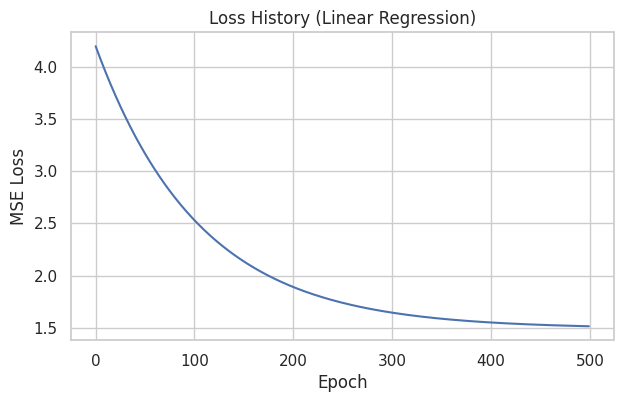

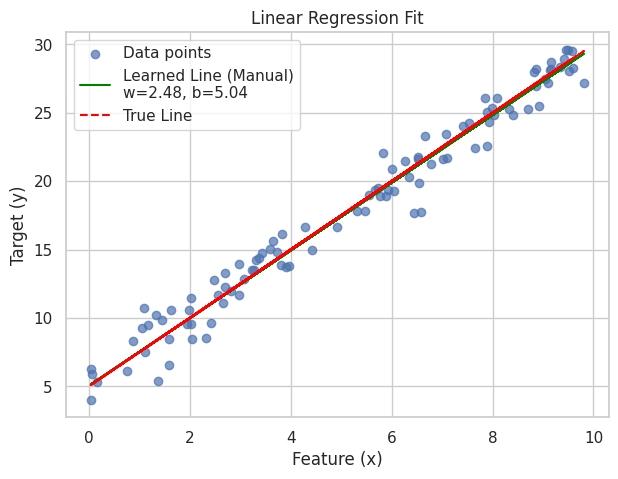

In [41]:
plt.figure(figsize=(7, 4)); plt.plot(loss_history_manual)
plt.title("Loss History (Linear Regression)"); plt.xlabel("Epoch"); plt.ylabel("MSE Loss"); plt.show()

plt.figure(figsize=(7, 5))
plt.scatter(x_train.numpy(), y_train.numpy(), alpha=0.7, label='Data points')
with torch.no_grad(): # Predictions for plotting
    predicted_line_manual = x_train.numpy() * weights_manual.item() + bias_manual.item()
plt.plot(x_train.numpy(), predicted_line_manual, color='green',
         label=f'Learned Line (Manual)\nw={weights_manual.item():.2f}, b={bias_manual.item():.2f}')
plt.plot(x, b + w * x, color='red', linestyle='--', label='True Line')
plt.xlabel("Feature (x)"); plt.ylabel("Target (y)")
plt.title("Linear Regression Fit"); plt.legend(); plt.show()

### Linear Regression using `torch.nn.Linear` and `torch.optim`

In [42]:
# model
model_nn = nn.Linear(in_features=1, out_features=1)

In [43]:

model_nn.weight.item(), model_nn.bias.item()

(-0.9948042631149292, 0.6692706346511841)

In [44]:
# loss function and optimizer
criterion_nn = nn.MSELoss()
lr_nn = 0.01
optimizer_nn = optim.SGD(model_nn.parameters(), lr=lr_nn)

In [45]:
epochs = 500
loss_history_nn = []
for epoch in range(epochs):
    # forward pass
    y_predicted_nn = model_nn(x_train)
    # Compute loss
    loss_nn = criterion_nn(y_predicted_nn, y_train)
    loss_history_nn.append(loss_nn.item())
    # backward pass
    optimizer_nn.zero_grad()
    loss_nn.backward()
    # update paramters
    optimizer_nn.step()

    if (epoch + 1) % 50 == 0:
        print(f"Epoch [{epoch+1}/{epochs}], Loss: {loss_nn.item():.4f}, "
              f"Weights: {model_nn.weight.item():.3f}, Bias: {model_nn.bias.item():.3f}")

print(f"-----------------------------------------")
final_weights_nn = model_nn.weight.item()
final_bias_nn = model_nn.bias.item()
print(f"Learned nn.Linear weights: {final_weights_nn:.4f} (True slope: {w})")
print(f"Learned nn.Linear bias: {final_bias_nn:.4f} (True intercept: {b})")

Epoch [50/500], Loss: 4.0364, Weights: 2.905, Bias: 2.133
Epoch [100/500], Loss: 3.0682, Weights: 2.804, Bias: 2.817
Epoch [150/500], Loss: 2.4685, Weights: 2.724, Bias: 3.356
Epoch [200/500], Loss: 2.0970, Weights: 2.662, Bias: 3.779
Epoch [250/500], Loss: 1.8668, Weights: 2.613, Bias: 4.113
Epoch [300/500], Loss: 1.7243, Weights: 2.574, Bias: 4.376
Epoch [350/500], Loss: 1.6359, Weights: 2.543, Bias: 4.582
Epoch [400/500], Loss: 1.5812, Weights: 2.519, Bias: 4.745
Epoch [450/500], Loss: 1.5473, Weights: 2.501, Bias: 4.873
Epoch [500/500], Loss: 1.5263, Weights: 2.486, Bias: 4.974
-----------------------------------------
Learned nn.Linear weights: 2.4857 (True slope: 2.5)
Learned nn.Linear bias: 4.9737 (True intercept: 5.0)


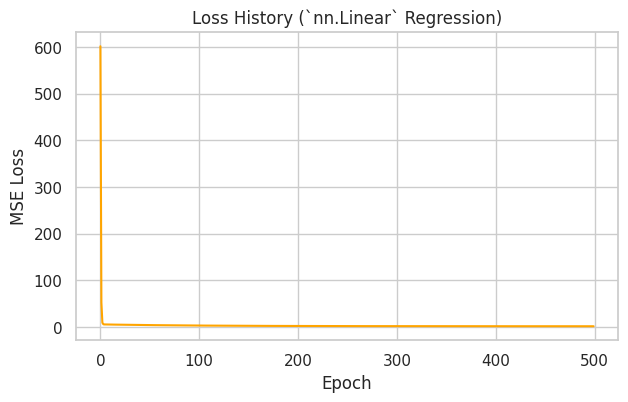

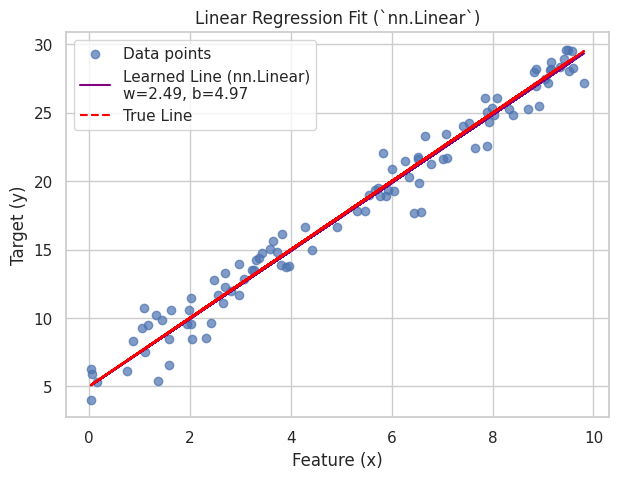

In [46]:
plt.figure(figsize=(7, 4)); plt.plot(loss_history_nn, color='orange')
plt.title("Loss History (`nn.Linear` Regression)"); plt.xlabel("Epoch"); plt.ylabel("MSE Loss"); plt.show()

plt.figure(figsize=(7, 5))
plt.scatter(x_train.numpy(), y_train.numpy(), alpha=0.7, label='Data points')
with torch.no_grad():
    predicted_line_nn = model_nn(x_train).numpy()
plt.plot(x_train.numpy(), predicted_line_nn, color='purple',
         label=f'Learned Line (nn.Linear)\nw={final_weights_nn:.2f}, b={final_bias_nn:.2f}')
plt.plot(x, b + w * x, color='red', linestyle='--', label='True Line')
plt.xlabel("Feature (x)"); plt.ylabel("Target (y)")
plt.title("Linear Regression Fit (`nn.Linear`)"); plt.legend(); plt.show()

### Analytical Solution: The Normal Equation

For Linear Regression, there's a closed-form solution to find the optimal θ without iterative gradient descent, provided (X^T @ X) is invertible. </br>
θ_optimal = (X^T @ X)^(-1) @ X^T @ y </br>
</br>
where, </br>
- X is the feature matrix WITH a column of 1s prepended for the bias term.
- y is the target vector.


In [48]:
# Prepare X_with_bias: Add a column of ones to x_train for the bias term
X_with_bias_numpy = np.c_[np.ones((x_train.shape[0], 1)), x_train.numpy()]
X_with_bias = torch.from_numpy(X_with_bias_numpy.astype(np.float32))
# y_train is already the correct shape

In [51]:
X_with_bias[:5]

tensor([[1.0000, 8.8227],
        [1.0000, 9.1500],
        [1.0000, 3.8286],
        [1.0000, 9.5931],
        [1.0000, 3.9045]])

Optimal parameters from Normal Equation:
  Intercept (bias, θ_0): 5.3461
  Slope (weights, θ_1): 2.4307


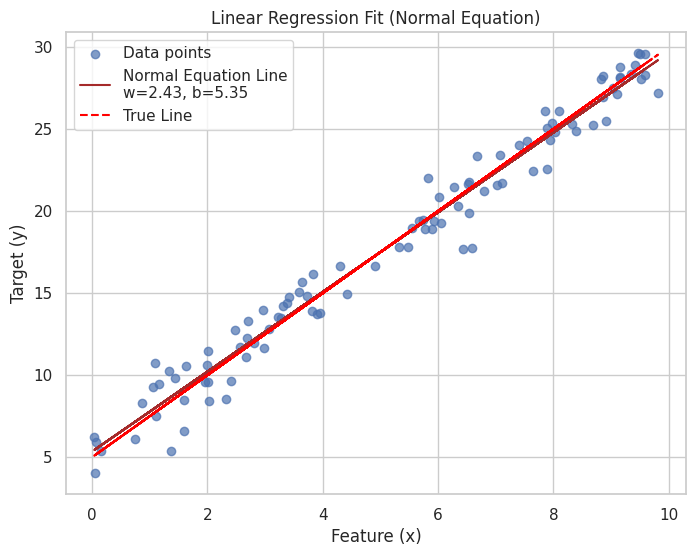

In [53]:
try:
    # theta_optimal = (X_with_bias.T @ X_with_bias).inverse() @ X_with_bias.T @ y_train
    # Using torch.linalg.solve for better numerical stability than direct inverse
    # (X^T X) θ = X^T y =>  A θ = B
    # A = X_b_tensor.T @ X_b_tensor
    A_normal_eq = X_with_bias.T @ X_with_bias
    B_normal_eq = X_with_bias.T @ y_train
    theta_optimal_normal_eq = torch.linalg.solve(A_normal_eq, B_normal_eq)
    
    bias_normal_eq = theta_optimal_normal_eq[0].item()
    weights_normal_eq = theta_optimal_normal_eq[1].item() # For single feature

    print(f"Optimal parameters from Normal Equation:")
    print(f"  Intercept (bias, θ_0): {bias_normal_eq:.4f}")
    print(f"  Slope (weights, θ_1): {weights_normal_eq:.4f}")
    
    plt.figure(figsize=(8, 6))
    plt.scatter(x_train.numpy(), y_train.numpy(), alpha=0.7, label='Data points')
    with torch.no_grad():
        predicted_line_normal_eq = (X_with_bias @ theta_optimal_normal_eq).numpy()
    plt.plot(x_train.numpy(), predicted_line_normal_eq, color='brown',
             label=f'Normal Equation Line\nw={weights_normal_eq:.2f}, b={bias_normal_eq:.2f}')
    plt.plot(x, b + w * x, color='red', linestyle='--', label='True Line')
    plt.xlabel("Feature (x)"); plt.ylabel("Target (y)")
    plt.title("Linear Regression Fit (Normal Equation)"); plt.legend(); plt.show()

except torch.linalg.LinAlgError as e:
    print(f"Could not solve using Normal Equation (matrix might be singular): {e}")

### Model Evaluation

Common metrics for regresion:
- Mean Squared error (MSE): Average of the squared differences between actual and predicted values. Lower is better.
- Root Mean Squared error (RMSE): Square root of MSE. In the same units as the target.
- R-squared (Coefficient of Determination): Proportion of the variance in the dependent variable that is predictable from the independent variable(s). Ranges from -inf to 1. Higher is better (1 is perfect)

In [54]:
with torch.no_grad():
    y_pred_scratch_eval = x_train * w + b 

In [57]:
y_pred_scratch_eval[:5]

tensor([[27.0567],
        [27.8751],
        [14.5716],
        [28.9826],
        [14.7612]])

In [58]:
mse_scratch = mean_squared_error(y_train.numpy(), y_pred_scratch_eval.numpy())
r2_scratch = r2_score(y_train.numpy(), y_pred_scratch_eval.numpy())

In [60]:
print(f"  Mean Squared Error (MSE): {mse_scratch:.4f}")
print(f"  Root Mean Squared Error (RMSE): {np.sqrt(mse_scratch):.4f}")
print(f"  R-squared (R2): {r2_scratch:.4f}")

  Mean Squared Error (MSE): 1.5335
  Root Mean Squared Error (RMSE): 1.2383
  R-squared (R2): 0.9706


In [63]:
# nn.Linear Model Evaluation
with torch.no_grad():
    y_pred_nn_eval = model_nn(x_train)
mse_nn_eval = mean_squared_error(y_train.numpy(), y_pred_nn_eval.numpy())
r2_nn_eval = r2_score(y_train.numpy(), y_pred_nn_eval.numpy())
print("\n`nn.Linear` Model Evaluation:")
print(f"  MSE: {mse_nn_eval:.4f}, RMSE: {np.sqrt(mse_nn_eval):.4f}, R2: {r2_nn_eval:.4f}")


`nn.Linear` Model Evaluation:
  MSE: 1.5260, RMSE: 1.2353, R2: 0.9708


In [64]:
# Normal Equation Model Evaluation
if 'theta_optimal_normal_eq' in locals():
    with torch.no_grad():
        y_pred_normal_eq_eval = X_with_bias @ theta_optimal_normal_eq
    mse_normal_eval = mean_squared_error(y_train.numpy(), y_pred_normal_eq_eval.numpy())
    r2_normal_eval = r2_score(y_train.numpy(), y_pred_normal_eq_eval.numpy())
    print("\nNormal Equation Model Evaluation:")
    print(f"  MSE: {mse_normal_eval:.4f}, RMSE: {np.sqrt(mse_normal_eval):.4f}, R2: {r2_normal_eval:.4f}")


Normal Equation Model Evaluation:
  MSE: 1.4922, RMSE: 1.2215, R2: 0.9714
